In [1]:
import librosa
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

from modulation_toolbox_py.demod.moddecompcog import moddecompcog
from modulation_toolbox_py.demod.moddecomphilb import moddecomphilb
from modulation_toolbox_py.filterbank.cutoffs2fbdesign import cutoffs2fbdesign
from modulation_toolbox_py.filterbank.designfilterbank import designfilterbank
from modulation_toolbox_py.filterbank.designfilterbank_stft import designfilterbankstft
from modulation_toolbox_py.filterbank.filterbankfreqz import filterbankfreqz
from modulation_toolbox_py.filterbank.filtersubbands import filtersubbands

In [2]:
x, fs = sf.read('sounds/speech_female.wav')

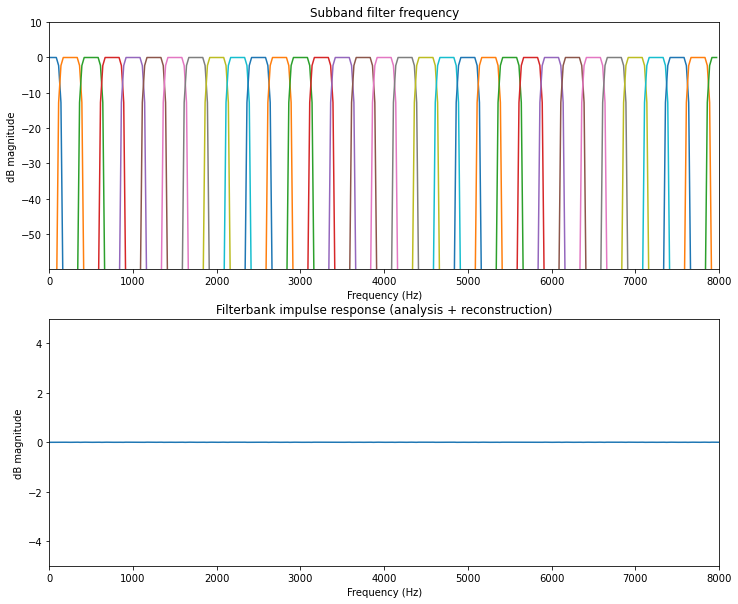

In [3]:
#filterbank design
numHalfBands = 64
sharpness = 9
decFactor = 64//4
fb1 = designfilterbankstft(numHalfBands, sharpness, decFactor)
filterbankfreqz(fb1, None, fs)

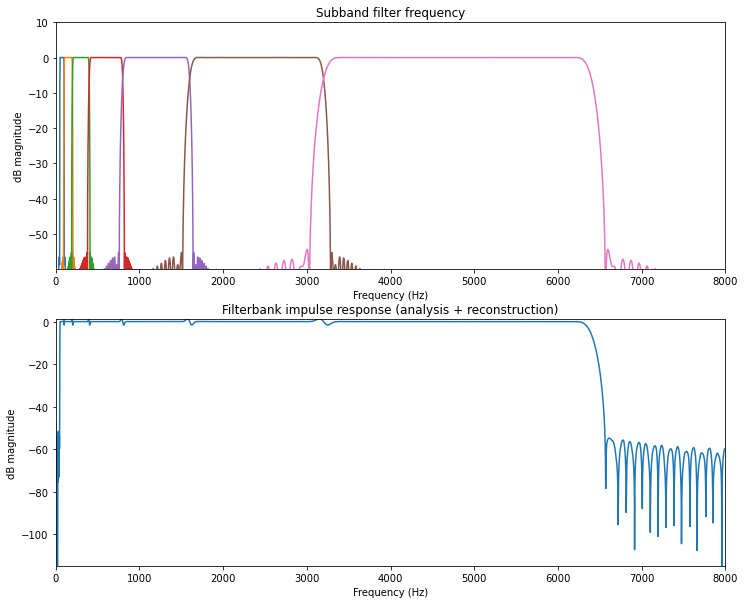

In [4]:
cutoffs = (2/fs) * np.array([50,100,200,400,800,1600,3200,6400])
centers, bandwidths = cutoffs2fbdesign(cutoffs)
fb2 = designfilterbank(centers, bandwidths)
filterbankfreqz(fb2,None,fs)

In [5]:
S = filtersubbands(x, fb1)
modFs = fs / decFactor

carrierWinLen = 2 ** np.ceil( np.log2( modFs / 10 ) )
carrierHop = carrierWinLen / 2



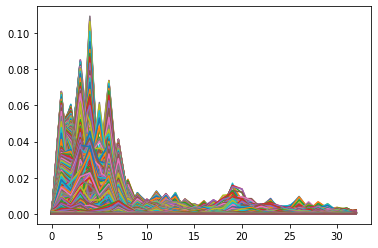

In [9]:
plt.plot(np.abs(S));plt.show()

In [ ]:
Mc, Cc, Fc = moddecompcog(S, carrierWinLen, carrierHop)



KeyboardInterrupt



In [ ]:
Mh, Ch, Fh = moddecomphilb(S)
